# Data preprocessing

## Import the required modules

In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import re
import ast

## Load the dataset
1. Load the dataset
2. Convert it into a pandas DataFrame

In [3]:
dataset_raw = dd.read_parquet('dataset/dataset_raw.parquet')

In [4]:
dataset_pd = pd.DataFrame(dataset_raw.compute())
dataset_pd.head()

,authors,title,comments,journal-ref,categories,abstract,update_date,authors_parsed,citation_count
doi,,,,,,,,,
10.1002/adfm.202001307,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast...",InSe Schottky diodes based on van der Waals co...,"25 pages, 13 figures, Main text and Supporting...","Advanced Functional Materials, 30, 2001307 (2020)",cond-mat.mes-hall cond-mat.mtrl-sci,Two-dimensional semiconductors are excellent...,2020-07-30,"[['Zhao', 'Qinghua', ''], ['Jie', 'Wanqi', '']...",33
10.1002/cphc.200900857,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ...",Boron Nitride Nanomesh: A template for Nano-ice,4 figures,"ChemPhysChem 2010, 11, 399",cond-mat.mtrl-sci cond-mat.mes-hall,Using variable temperature scanning tunnelin...,2010-02-04,"[['Ma', 'Haifeng', ''], ['Brugger', 'Thomas', ...",33
10.1002/prop.200710532,"Milovan Vasilic, Marko Vojinovic",Interaction of the Particle with the String in...,"Proceedings of the BW2007 conference, 5 pages","Fortsch.Phys.56:542,2008",gr-qc hep-th,Within the framework of generalized Papapetr...,2015-05-20,"[['Vasilic', 'Milovan', ''], ['Vojinovic', 'Ma...",1
10.1007/978-3-030-30493-5_44,"Itay Mosafi, Eli David, Nathan S. Netanyahu",DeepMimic: Mentor-Student Unlabeled Data Based...,<NA>,International Conference on Artificial Neural ...,cs.LG cs.NE stat.ML,"In this paper, we present a deep neural netw...",2019-12-03,"[['Mosafi', 'Itay', ''], ['David', 'Eli', ''],...",0
10.1007/lrr-2015-1,"Vitor Cardoso, Leonardo Gualtieri, Carlos Herd...",Exploring New Physics Frontiers Through Numeri...,"156 pages, 21 figures. Published in Living Rev...",<NA>,gr-qc astro-ph.HE hep-ph hep-th,The demand to obtain answers to highly compl...,2015-11-11,"[['Cardoso', 'Vitor', ''], ['Gualtieri', 'Leon...",55


## Feature Extraction
1. Extracting page count and number of figures
2. Extracting the number of authors
3. Extracting the year, month and day of the publication date

### Extracting page count and number of figures

In [5]:
# Let's look at the corresponding field first
display(dataset_pd["comments"].head(10))
display(
    f"Non-null elements: {dataset_pd['comments'].notna().sum() / len(dataset_pd['comments']):.2%}"
)


# Let's look at the pages attribute
def extract_page_number(comment: str) -> int:
    try:
        return int(re.search(r"(\d+) pages", comment).group(1))
    except (ValueError, TypeError, AttributeError):
        return np.nan


print("Extracted pages")
dataset_pd["page_count"] = dataset_pd["comments"].apply(extract_page_number)
display(dataset_pd["page_count"].head(10))
display(
    f"Non-null elements: {dataset_pd['page_count'].notna().sum() / len(dataset_pd['page_count']):.2%}"
)


# Let's look at the figure count
def extract_figure_count(comment: str) -> int:
    try:
        return int(re.search(r"(\d+) figures", comment).group(1))
    except (ValueError, TypeError, AttributeError):
        return np.nan


print("Extracted figures")
dataset_pd["figure_count"] = dataset_pd["comments"].apply(extract_figure_count)
display(dataset_pd["figure_count"].head(10))
display(
    f"Non-null elements: {dataset_pd['figure_count'].notna().sum() / len(dataset_pd['figure_count']):.2%}"
)

display(
    f"Number of rows with both figures and pages: {dataset_pd[['figure_count', 'page_count']].notna().all(axis=1).sum() / len(dataset_pd):.2%}"
)

doi
10.1002/adfm.202001307          25 pages, 13 figures, Main text and Supporting...
10.1002/cphc.200900857                                                  4 figures
10.1002/prop.200710532              Proceedings of the BW2007 conference, 5 pages
10.1007/978-3-030-30493-5_44                                                 <NA>
10.1007/lrr-2015-1              156 pages, 21 figures. Published in Living Rev...
10.1007/s00025-018-0843-4                                                    <NA>
10.1007/s00220-011-1211-3                                         55 pages, LaTeX
10.1007/s00220-012-1502-3       This is the preprint of the version published ...
10.1007/s00220-013-1746-6       39 pages, 3 figures. (Minor improvements/corre...
10.1007/s00220-022-04520-9                                                   <NA>
Name: comments, dtype: string

'Non-null elements: 84.17%'

Extracted pages


doi
10.1002/adfm.202001307           25.0
10.1002/cphc.200900857            NaN
10.1002/prop.200710532            5.0
10.1007/978-3-030-30493-5_44      NaN
10.1007/lrr-2015-1              156.0
10.1007/s00025-018-0843-4         NaN
10.1007/s00220-011-1211-3        55.0
10.1007/s00220-012-1502-3         NaN
10.1007/s00220-013-1746-6        39.0
10.1007/s00220-022-04520-9        NaN
Name: page_count, dtype: float64

'Non-null elements: 66.37%'

Extracted figures


doi
10.1002/adfm.202001307          13.0
10.1002/cphc.200900857           4.0
10.1002/prop.200710532           NaN
10.1007/978-3-030-30493-5_44     NaN
10.1007/lrr-2015-1              21.0
10.1007/s00025-018-0843-4        NaN
10.1007/s00220-011-1211-3        NaN
10.1007/s00220-012-1502-3        NaN
10.1007/s00220-013-1746-6        3.0
10.1007/s00220-022-04520-9       NaN
Name: figure_count, dtype: float64

'Non-null elements: 46.08%'

'Number of rows with both figures and pages: 44.55%'

In [6]:
dataset_pd[["figure_count", "page_count"]].describe()

,figure_count,page_count
count,264450.000000,380908.000000
mean,8.267865,18.152528
std,12.493989,16.108582
min,0.000000,0.000000
25%,4.000000,9.000000
50%,6.000000,15.000000
75%,10.000000,23.000000
max,4989.000000,2018.000000


In [7]:
dataset_pd[dataset_pd["figure_count"] == 4989]

,authors,title,comments,journal-ref,categories,abstract,update_date,authors_parsed,citation_count,page_count,figure_count
doi,,,,,,,,,,,
10.1038/s41586-019-0954-4,"M. G. Vergniory, L. Elcoro, C. Felser, N. Regn...",The (High Quality) Topological Materials In Th...,"1958 pages and 4989 figures. New Version, seve...","Nature 566, 480-485 (2019)",cond-mat.mtrl-sci,"""Topological Quantum Chemistry (TQC) links t...",2019-11-15,"[['Vergniory', 'M. G.', ''], ['Elcoro', 'L.', ...",565,1958.0,4989.0


### Extracting the number of authors

In [8]:
# Let's look at the authors
dataset_pd["authors"].values[:20]

dataset_pd["author_count"] = dataset_pd["authors_parsed"].apply(
    lambda authors: len(ast.literal_eval(authors))
)

display(dataset_pd["author_count"].describe())


count    573904.000000
mean          5.275722
std          22.210146
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        2832.000000
Name: author_count, dtype: float64

In [9]:
dataset_pd[dataset_pd["author_count"] > 1000].head(5)

,authors,title,comments,journal-ref,categories,abstract,update_date,authors_parsed,citation_count,page_count,figure_count,author_count
doi,,,,,,,,,,,,
10.3847/1538-4357/ac6acf,"The LIGO Scientific Collaboration, the Virgo C...",Searches for Gravitational Waves from Known Pu...,37 pages,<NA>,astro-ph.HE gr-qc,We present a targeted search for continuous ...,2022-08-31,"[['The LIGO Scientific Collaboration', '', '']...",4,37.0,NaN,1697
10.3847/2041-8213/aa93fc,The LIGO Scientific Collaboration and the Virg...,On the Progenitor of Binary Neutron Star Merge...,"18 pages, 8 figures, 2 tables","ApJL, 850, L40, 2017",astro-ph.HE,On 2017 August 17 the merger of two compact ...,2017-12-04,"[['The LIGO Scientific Collaboration', '', '']...",55,18.0,8.0,1098
10.3847/2041-8213/aa9a35,The LIGO Scientific Collaboration and the Virg...,Search for post-merger gravitational waves fro...,<NA>,"ApJL, 851:L16 (2017)",astro-ph.HE gr-qc,The first observation of a binary neutron st...,2017-12-18,"[['The LIGO Scientific Collaboration', '', '']...",156,NaN,NaN,1108
10.3847/0067-0049/225/1/8,"B. P. Abbott, R. Abbott, T. D. Abbott, M. R. A...",Supplement: Localization and broadband follow-...,"For the main Letter, see arXiv:1602.08492","The Astrophysical Journal Supplement Series, 2...",astro-ph.HE gr-qc,This Supplement provides supporting material...,2016-07-22,"[['Abbott', 'B. P.', '', 'The LIGO Scientific ...",39,NaN,NaN,1547
10.3847/1538-4357/aaf21d,"ANTARES, IceCube, LIGO, Virgo Collaborations: ...",Search for Multi-messenger Sources of Gravitat...,"20 pages, 2 figures",Astrophys.J. 870 (2019) 134,astro-ph.HE,Astrophysical sources of gravitational waves...,2020-08-14,"[['ANTARES', '', ''], ['IceCube', '', ''], ['L...",30,20.0,2.0,1595


### Extracting the year, month and day of the publication date

In [10]:
display(dataset_pd["update_date"].head(5))

dataset_pd["update_date"] = pd.to_datetime(dataset_pd["update_date"])
dataset_pd["year"] = dataset_pd["update_date"].dt.year
dataset_pd["month"] = dataset_pd["update_date"].dt.month
dataset_pd["day"] = dataset_pd["update_date"].dt.day

dataset_pd[["update_date", "year", "month", "day"]].head(5)

doi
10.1002/adfm.202001307          2020-07-30
10.1002/cphc.200900857          2010-02-04
10.1002/prop.200710532          2015-05-20
10.1007/978-3-030-30493-5_44    2019-12-03
10.1007/lrr-2015-1              2015-11-11
Name: update_date, dtype: string

,update_date,year,month,day
doi,,,,
10.1002/adfm.202001307,2020-07-30,2020,7,30
10.1002/cphc.200900857,2010-02-04,2010,2,4
10.1002/prop.200710532,2015-05-20,2015,5,20
10.1007/978-3-030-30493-5_44,2019-12-03,2019,12,3
10.1007/lrr-2015-1,2015-11-11,2015,11,11


### Concatenating all text columns

In [11]:
text_columns = ["authors", "title", "journal-ref", "categories", "abstract"]

for column in text_columns:
    dataset_pd[column].loc[dataset_pd[column].notna() == False] = ""

dataset_pd["text"] = dataset_pd[text_columns].apply(
    lambda x: " ".join(x), axis=1
)

### Dropping the unnecessary columns and saving the dataset

In [12]:
dataset_pd = dataset_pd.drop(["comments", "authors_parsed", "update_date"] + text_columns, axis=1)
dataset_pd.head()

,citation_count,page_count,figure_count,author_count,year,month,day,text
doi,,,,,,,,
10.1002/adfm.202001307,33,25.0,13.0,5,2020,7,30,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast..."
10.1002/cphc.200900857,33,NaN,4.0,8,2010,2,4,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ..."
10.1002/prop.200710532,1,5.0,NaN,2,2015,5,20,"Milovan Vasilic, Marko Vojinovic Interaction o..."
10.1007/978-3-030-30493-5_44,0,NaN,NaN,3,2019,12,3,"Itay Mosafi, Eli David, Nathan S. Netanyahu De..."
10.1007/lrr-2015-1,55,156.0,21.0,4,2015,11,11,"Vitor Cardoso, Leonardo Gualtieri, Carlos Herd..."


In [13]:
dataset_pd.to_parquet("dataset/dataset_feature_extracted.parquet")

## Data cleaning

1. Remove duplicates
2. Deal with missing data
3. Deal with outliers
4. ...

### Loading the dataset from parquet

In [14]:
dataset_pd = pd.read_parquet("dataset/dataset_feature_extracted.parquet")
dataset_pd.head()

,citation_count,page_count,figure_count,author_count,year,month,day,text
doi,,,,,,,,
10.1002/adfm.202001307,33,25.0,13.0,5,2020,7,30,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast..."
10.1002/cphc.200900857,33,NaN,4.0,8,2010,2,4,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ..."
10.1002/prop.200710532,1,5.0,NaN,2,2015,5,20,"Milovan Vasilic, Marko Vojinovic Interaction o..."
10.1007/978-3-030-30493-5_44,0,NaN,NaN,3,2019,12,3,"Itay Mosafi, Eli David, Nathan S. Netanyahu De..."
10.1007/lrr-2015-1,55,156.0,21.0,4,2015,11,11,"Vitor Cardoso, Leonardo Gualtieri, Carlos Herd..."


In [15]:
ratio_attributes = [
    'citation_count', 'page_count', 'figure_count', 'author_count'
]
date_attributes = ['year', 'month', 'day']
nominal_attributes = ['text']

dataset_ratio = dataset_pd[ratio_attributes]
dataset_date = dataset_pd[date_attributes]
dataset_nominal = dataset_pd[nominal_attributes]

### Ratio Attributes

In [16]:
# Analyze the ratio attributes
for column in ratio_attributes:
    print(f"Column: {column}")
    print(f"Number of null values: {dataset_ratio[column].isna().sum()}")
    print(f"Number of zero values: {len(dataset_ratio[dataset_ratio[column] == 0])}")
    print(f"Number of negative values: {len(dataset_ratio[dataset_ratio[column] < 0])}")
    print(f"Number of positive values: {len(dataset_ratio[dataset_ratio[column] > 0])}")
    print(f"Number of unique values: {len(dataset_ratio[column].unique())}")
    print(f"Min value: {dataset_ratio[column].min()}")
    print(f"Max value: {dataset_ratio[column].max()}")
    print(f"Mean value: {dataset_ratio[column].mean()}")
    print(f"Median value: {dataset_ratio[column].median()}")
    print(f"Standard deviation: {dataset_ratio[column].std()}")
    print(f"Skewness: {dataset_ratio[column].skew()}")
    print(f"Kurtosis: {dataset_ratio[column].kurtosis()}")
    print("\n")

Column: citation_count
Number of null values: 0
Number of zero values: 50204
Number of negative values: 0
Number of positive values: 523700
Number of unique values: 1598
Min value: 0
Max value: 50051
Mean value: 30.975079455797484
Median value: 10.0
Standard deviation: 143.81450865876724
Skewness: 107.80550339700322
Kurtosis: 28460.26843060588


Column: page_count
Number of null values: 192996
Number of zero values: 6
Number of negative values: 0
Number of positive values: 380902
Number of unique values: 317
Min value: 0.0
Max value: 2018.0
Mean value: 18.15252764447058
Median value: 15.0
Standard deviation: 16.108581656085107
Skewness: 19.720864144417078
Kurtosis: 1796.2349199002897


Column: figure_count
Number of null values: 309454
Number of zero values: 609
Number of negative values: 0
Number of positive values: 263841
Number of unique values: 179
Min value: 0.0
Max value: 4989.0
Mean value: 8.26786538097939
Median value: 6.0
Standard deviation: 12.493988771245423
Skewness: 246.05

**Observations:**
- citation_count:
  - outliers (50k+ citations?)
  - high std
  - 10% zero values <-> 13 values with >10k citations
- page_count:
  - zero values need to be removed
  - 193k missing values
  - we checked the max value and it seems legit
- figure_count:
  - zero values are expected
  - 309k missing values -> could be set to 0 (since it is plausible that they wouldn't include a figure count if there are no figures)
  - we checked the max value and it seems legit
- author_count:
  - we checked the max value and it seems legit

**Action Plan:**
- citation_count:
  - outliers are taken care of by bucketing
  - no special need for cleaning
  - misbalanced classes obtained by bucketing are taken care of at a later stage
- figure_count:
  - we will set the missing values to 0 since we expect it to reflect reality (we checked a couple of examples manually)
- page_count:
  - this is the biggest issue since we have no way of knowing the actual page count
  - Idea 1: Impute missing values with the mean / median of the non-missing values
    - Dataset size would be retained
    - We expect the text data to be most relevant to our question -> page number are not as relevant
  - Idea 2: Remove papers without page count
    - Dataset would be clean
    - We would heavily truncate the dataset
  - => We will try both approaches and see which one works better


In [17]:
# Fill in missing values in figure_count
dataset_pd["figure_count"] = dataset_pd["figure_count"].fillna(0)

# page_count imputing
dataset_pd["page_imputed"] = dataset_pd["page_count"].isna()
dataset_pd["page_count"] = dataset_pd["page_count"].fillna(
    dataset_pd["page_count"].median()
) # 15 klingt gut, alda

dataset_pd.head()

,citation_count,page_count,figure_count,author_count,year,month,day,text,page_imputed
doi,,,,,,,,,
10.1002/adfm.202001307,33,25.0,13.0,5,2020,7,30,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast...",False
10.1002/cphc.200900857,33,15.0,4.0,8,2010,2,4,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ...",True
10.1002/prop.200710532,1,5.0,0.0,2,2015,5,20,"Milovan Vasilic, Marko Vojinovic Interaction o...",False
10.1007/978-3-030-30493-5_44,0,15.0,0.0,3,2019,12,3,"Itay Mosafi, Eli David, Nathan S. Netanyahu De...",True
10.1007/lrr-2015-1,55,156.0,21.0,4,2015,11,11,"Vitor Cardoso, Leonardo Gualtieri, Carlos Herd...",False


c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

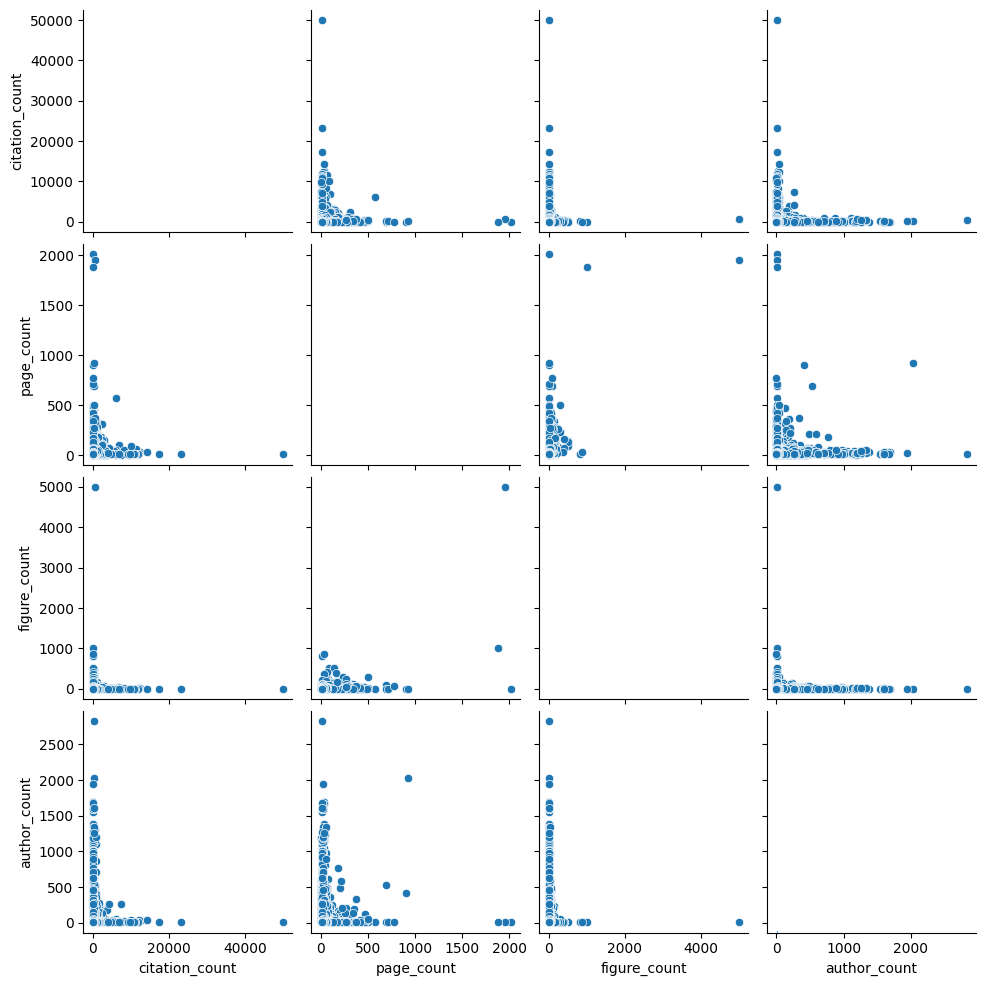

In [19]:
# scatter plot of all ratio attributes
sns.pairplot(dataset_pd[ratio_attributes])


**Observation**
We see that even though the outliers in `figure_count`, `page_count`, and `citation_count` are not wrong, they are very rare and might hinder the performance of our model. Therefore, we will remove the corresponding papers from our dataset.

Note that we might prevent our model later on from predicting papers to have incredibly high success (citation_count), but we think that this is a good trade-off, since it will perform better on the majority of papers. The same applies to figure, and page count. The model probably will not handle papers well that have extraordinarily high page or figure counts.

In [20]:
ds_copy = dataset_pd.copy()
OUTLIER_THRESHOLD = 10
total_removed = 0
for column in ratio_attributes:
    threshold = ds_copy[column].std() * OUTLIER_THRESHOLD
    print(f"Threshold for {column}: {threshold}")
    count_before = len(ds_copy)
    ds_copy = ds_copy[ds_copy[column] < threshold]
    count_after = len(ds_copy)
    print(f"Number of rows removed: {count_before - count_after}")
    total_removed += count_before - count_after
print(f"Total removed: {total_removed}")

Threshold for citation_count: 1438.1450865876723
Number of rows removed: 421
Threshold for page_count: 131.59283257132768
Number of rows removed: 576
Threshold for figure_count: 63.40450045238767
Number of rows removed: 249
Threshold for author_count: 219.52233010303527
Number of rows removed: 679
Total removed: 1925


**Observation:**
Running the above cell with different thresholds:

5:
```log
    Threshold for citation_count: 719.072543293066
    Number of rows removed: 1450
    Threshold for page_count: 65.35898562697088
    Number of rows removed: 4386
    Threshold for figure_count: 30.09493527532767
    Number of rows removed: 2009
    Threshold for author_count: 108.37146424753534
    Number of rows removed: 1414
    Total removed: 9259
```

10:
```log
    Threshold for citation_count: 1438.145086586132
    Number of rows removed: 421
    Threshold for page_count: 131.59283257142553
    Number of rows removed: 576
    Threshold for figure_count: 63.40450045259325
    Number of rows removed: 249
    Threshold for author_count: 219.5223301031425
    Number of rows removed: 679
    Total removed: 1925
```

c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

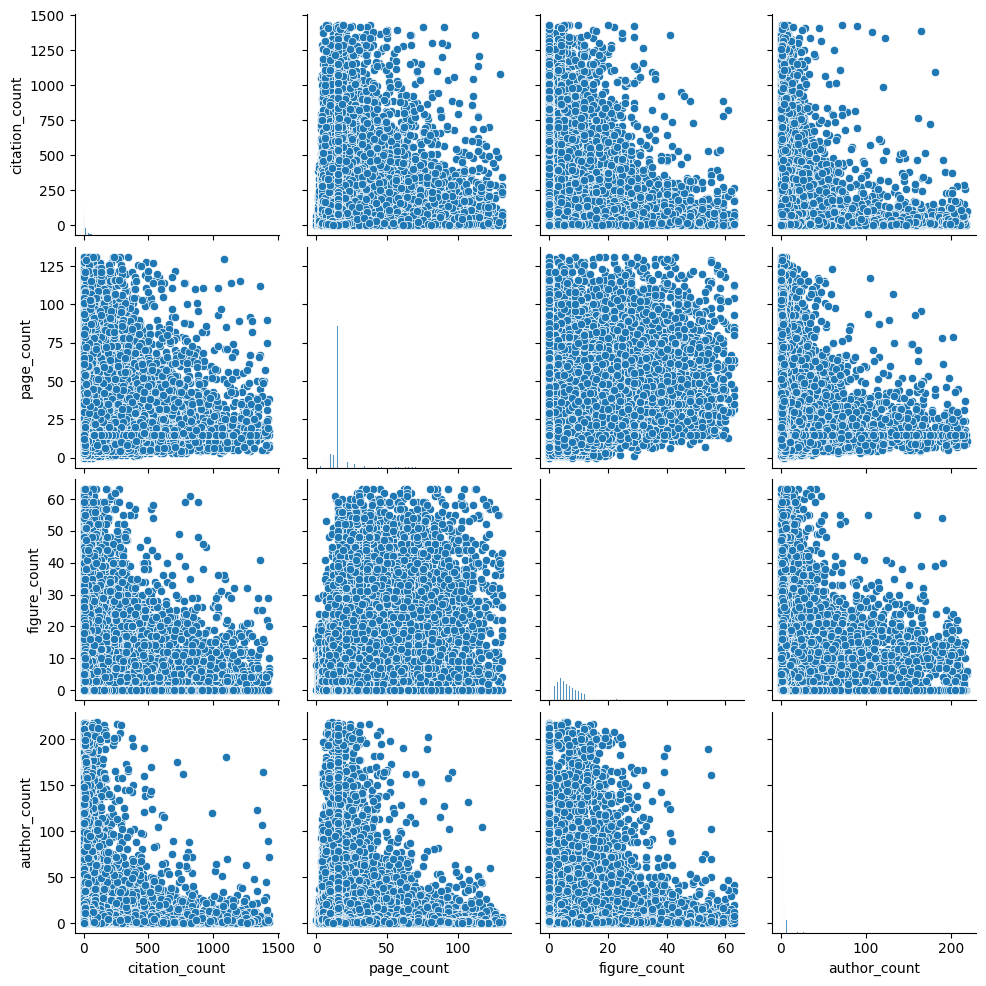

In [21]:
sns.pairplot(ds_copy[ratio_attributes])

**Observation:**
We find that the threshold of 10 provides data without any significant outliers.
We only removed $1925 \hat{=} 0.34\%$ of the data.

=> We'll go with a threshold of 10 standard deviations.

In [22]:
dataset_pd = ds_copy

### Date Attributes

In [23]:
# Are there any NaNs?
display(dataset_pd["year"].isna().sum())

dataset_pd[date_attributes].describe()

0

,year,month,day
count,571979.000000,571979.000000,571979.000000
mean,2015.440653,7.132405,16.258964
std,4.576793,3.360015,8.604326
min,2007.000000,1.000000,1.000000
25%,2011.000000,5.000000,10.000000
50%,2016.000000,7.000000,16.000000
75%,2019.000000,11.000000,24.000000
max,2023.000000,12.000000,31.000000


In [24]:
dataset_pd.to_parquet("dataset/dataset_cleaned.parquet")

## Defining the target variable
1. Analyzing the citation count distribution
2. Group citations into categories
3. Create ordinal target variable

### Loading the dataset from parquet

In [25]:
dataset_pd = pd.read_parquet("dataset/dataset_cleaned.parquet")
dataset_pd.head()

,citation_count,page_count,figure_count,author_count,year,month,day,text,page_imputed
doi,,,,,,,,,
10.1002/adfm.202001307,33,25.0,13.0,5,2020,7,30,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast...",False
10.1002/cphc.200900857,33,15.0,4.0,8,2010,2,4,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ...",True
10.1002/prop.200710532,1,5.0,0.0,2,2015,5,20,"Milovan Vasilic, Marko Vojinovic Interaction o...",False
10.1007/978-3-030-30493-5_44,0,15.0,0.0,3,2019,12,3,"Itay Mosafi, Eli David, Nathan S. Netanyahu De...",True
10.1007/s00025-018-0843-4,24,15.0,0.0,2,2018,6,8,Deepshikha and Lalit K. Vashisht Weaving K-fra...,True


### Analyze the citation count distribution
1. Calculate the descriptive statistics
2. Calculate the number of elements for given count ranges
3. Plot the distribution as histogram

In [26]:
print("Descriptive statistics:")
print(dataset_pd["citation_count"].describe())
print("")

count_ranges = [
    (0, 5),
    (5, 10),
    (10, 20),
    (20, 50),
    (50, 100),
    (100, 500),
    (500, 1000),
    (1000, 5000),
    (5000, 10000),
    (10000, 100000),
]
for count_range in count_ranges:
    print(
        f"Number of elements between {count_range[0]} and {count_range[1]}: {len(dataset_pd[(dataset_pd['citation_count'] >= count_range[0]) & (dataset_pd['citation_count'] < count_range[1])])}"
    )

Descriptive statistics:
count    571979.000000
mean         28.397523
std          67.528856
min           0.000000
25%           3.000000
50%          10.000000
75%          27.000000
max        1435.000000
Name: citation_count, dtype: float64

Number of elements between 0 and 5: 185119
Number of elements between 5 and 10: 95187


Number of elements between 10 and 20: 103314
Number of elements between 20 and 50: 109892
Number of elements between 50 and 100: 46465
Number of elements between 100 and 500: 29743
Number of elements between 500 and 1000: 1846
Number of elements between 1000 and 5000: 413
Number of elements between 5000 and 10000: 0
Number of elements between 10000 and 100000: 0


<Axes: title={'center': 'Citation Count Distribution'}, ylabel='Frequency'>

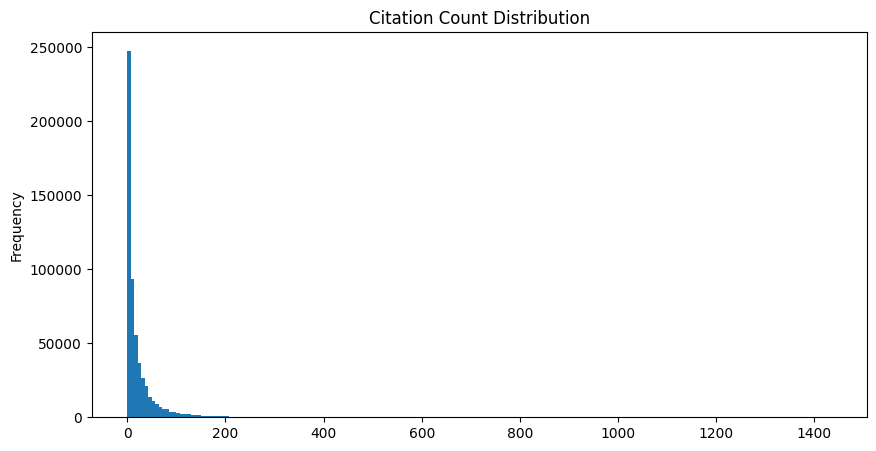

In [27]:
dataset_pd['citation_count'].plot(kind='hist', bins=200, logy=False, figsize=(10, 5), title='Citation Count Distribution')

**Observation:**
- The distribution is very skewed: The majority of papers have a low citation count (plausible)
- Even with 3 - 10 citations, a paper is in the second quartile
  
**Action Plan:**
- We will try to bucket the citation count into 3 categories:
  - low: 0 - 3
  - medium: 4 - 20
  - high: 21 - 100
  - star: 101+

,citation_count,page_count,figure_count,author_count,year,month,day,text,page_imputed,citation_bucket
doi,,,,,,,,,,
10.1002/adfm.202001307,33,25.0,13.0,5,2020,7,30,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast...",False,high
10.1002/cphc.200900857,33,15.0,4.0,8,2010,2,4,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ...",True,high
10.1002/prop.200710532,1,5.0,0.0,2,2015,5,20,"Milovan Vasilic, Marko Vojinovic Interaction o...",False,low
10.1007/978-3-030-30493-5_44,0,15.0,0.0,3,2019,12,3,"Itay Mosafi, Eli David, Nathan S. Netanyahu De...",True,low
10.1007/s00025-018-0843-4,24,15.0,0.0,2,2018,6,8,Deepshikha and Lalit K. Vashisht Weaving K-fra...,True,high


<Axes: title={'center': 'Citation Bucket Distribution'}, xlabel='citation_bucket'>

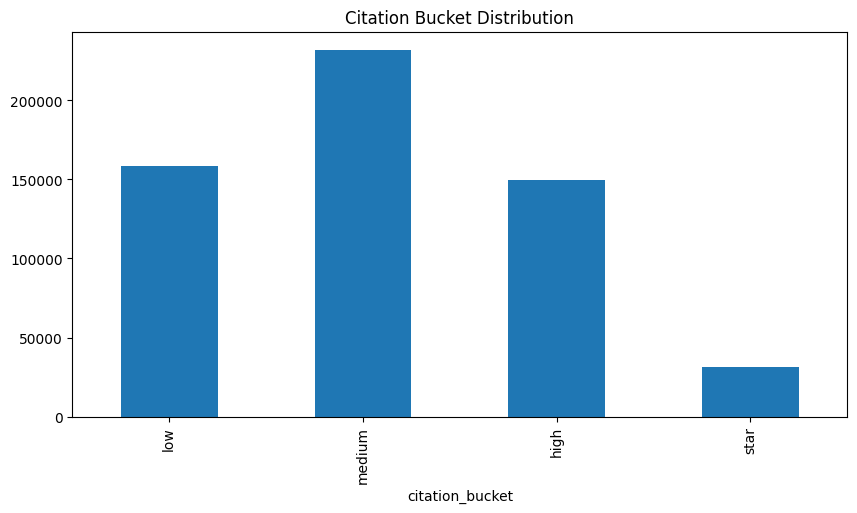

In [28]:
# Define the bins and labels for the buckets
bins = [-1, 3, 20, 100, float('inf')]
labels = ['low', 'medium', 'high', 'star']

# Create a new column with the bucket id based on the citation count
dataset_pd['citation_bucket'] = pd.cut(dataset_pd['citation_count'], bins=bins, labels=labels)

# Print the first 5 rows of the dataset with the new column
display(dataset_pd.head())

# Sort the value counts by the order of labels
sorted_counts = dataset_pd['citation_bucket'].value_counts().reindex(labels)

# Plot the sorted value counts
sorted_counts.plot(kind='bar', figsize=(10, 5), title='Citation Bucket Distribution')


In [29]:
# Drop the citation count like its hot
dataset_pd = dataset_pd.drop('citation_count', axis=1)
dataset_pd.head()

,page_count,figure_count,author_count,year,month,day,text,page_imputed,citation_bucket
doi,,,,,,,,,
10.1002/adfm.202001307,25.0,13.0,5,2020,7,30,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast...",False,high
10.1002/cphc.200900857,15.0,4.0,8,2010,2,4,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ...",True,high
10.1002/prop.200710532,5.0,0.0,2,2015,5,20,"Milovan Vasilic, Marko Vojinovic Interaction o...",False,low
10.1007/978-3-030-30493-5_44,15.0,0.0,3,2019,12,3,"Itay Mosafi, Eli David, Nathan S. Netanyahu De...",True,low
10.1007/s00025-018-0843-4,15.0,0.0,2,2018,6,8,Deepshikha and Lalit K. Vashisht Weaving K-fra...,True,high


In [30]:
dataset_pd.to_parquet("dataset/dataset_labeled.parquet")

## Plot diagrams for the submission

In [2]:
dataset_pd = pd.read_parquet('dataset/dataset_labeled.parquet')

c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jurek\Anaconda3\envs\ai_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

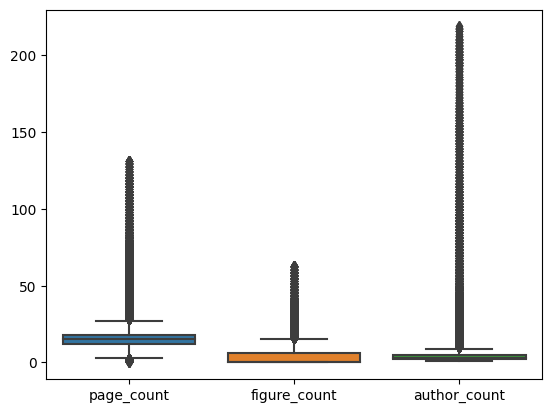

In [3]:
sns.boxplot(data=dataset_pd[['page_count', 'figure_count', 'author_count']])

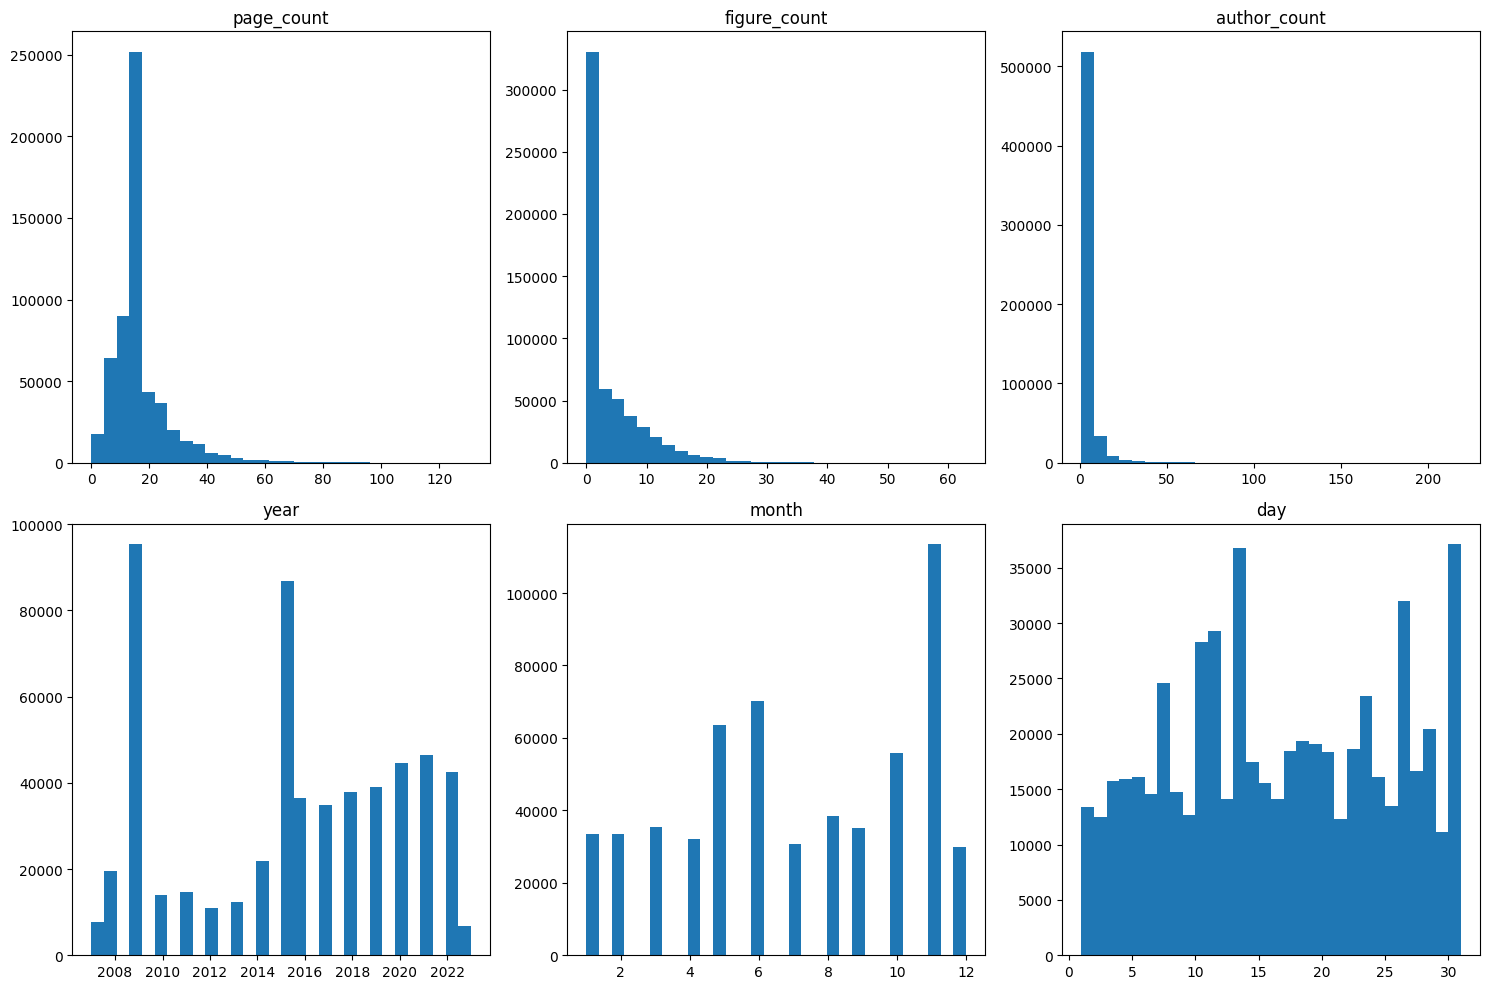

In [4]:
# create a list of columns to plot histograms for
columns = ['page_count', 'figure_count', 'author_count', 'year', 'month', 'day']

# create a figure with subplots for each column
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# loop through each column and plot a histogram on the corresponding subplot
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    axs[row, col].hist(dataset_pd[column], bins=30)
    axs[row, col].set_title(column)

# adjust spacing between subplots
plt.tight_layout()

# display the figure
plt.show()
